<a href="https://colab.research.google.com/github/yeseul106/Cow_Contest/blob/main/LSTM_cow_contest_Predicting_Consumer_Price_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# input size 바꿔서 돌려보기 !

In [ ]:
# 상관 계수 낮은 feature는 빼고 진행 !

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**소비자 가격 예측하기**

90일 간 데이터를 이용하여 향후 한달 가격 예측 <br>

input shape : 9 X 90 

output shape : 1 X 30






In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

'''''''''''''''read csv file'''''''''''''''
trainData = pd.read_csv('/content/drive/MyDrive/cow_contest/preprocessed_unNormalized_2015_2019.csv', encoding='cp949')
testData =  pd.read_csv('/content/drive/MyDrive/cow_contest/preprocessed_unNormalized_2020.csv', encoding='cp949')
print("2015_2019 데이터 shape :",trainData.shape)
print("2020 데이터 shape :",testData.shape)
trainData.head(5)  # 정규화까지 processing한 상태

2015_2019 데이터 shape : (1235, 16)
2020 데이터 shape : (251, 16)


,날짜,가임암소 수,도축 수,암송아지가격,숫송아지가격,소비자 심리지수,물가 총지수,물가 농축수산물지수,도체 중량,생산량,출생두수,사육비,도매 가격,소비자 가격,당해 도매 가격,당해 소비자 가격
0,20150102,571347,96045,839.000000,1370.0,102.0,99.77,99.74,413.051366,267,50325,6867510,17343,78497,14255,64390
1,20150105,571347,96045,839.333333,1430.0,102.0,99.77,99.74,413.051366,267,50325,6867510,18445,78548,14158,65654
2,20150106,571347,96045,839.666667,1490.0,102.0,99.77,99.74,413.051366,267,50325,6867510,18813,78738,14758,65397
3,20150107,571347,96045,840.000000,1550.0,102.0,99.77,99.74,413.051366,267,50325,6867510,18905,76974,14838,65539
4,20150108,571347,96045,852.000000,1555.0,102.0,99.77,99.74,413.051366,267,50325,6867510,18950,76924,14859,62858


In [ ]:
'''''''''''''''seperate x and y data'''''''''''''''
# 일단 지금은 한달 가격 예측이므로 1년 뒤 도매 가격 제거
trainData = trainData.drop(columns=['소비자 가격'])

In [ ]:
trainData.head(5)

,날짜,가임암소 수,도축 수,암송아지가격,숫송아지가격,소비자 심리지수,물가 총지수,물가 농축수산물지수,도체 중량,생산량,출생두수,사육비,도매 가격,당해 도매 가격,당해 소비자 가격
0,20150102,571347,96045,839.000000,1370.0,102.0,99.77,99.74,413.051366,267,50325,6867510,17343,14255,64390
1,20150105,571347,96045,839.333333,1430.0,102.0,99.77,99.74,413.051366,267,50325,6867510,18445,14158,65654
2,20150106,571347,96045,839.666667,1490.0,102.0,99.77,99.74,413.051366,267,50325,6867510,18813,14758,65397
3,20150107,571347,96045,840.000000,1550.0,102.0,99.77,99.74,413.051366,267,50325,6867510,18905,14838,65539
4,20150108,571347,96045,852.000000,1555.0,102.0,99.77,99.74,413.051366,267,50325,6867510,18950,14859,62858


In [ ]:
# 도매 가격만 먼저 예측해보기 위함이므로 소비자 가격, 당해 소비자 가격 제거
trainData = trainData.drop(columns=['도매 가격', '당해 도매 가격','날짜', '도축 수', '생산량', '출생두수'])
trainData.head(5)

,가임암소 수,암송아지가격,숫송아지가격,소비자 심리지수,물가 총지수,물가 농축수산물지수,도체 중량,사육비,당해 소비자 가격
0,571347,839.000000,1370.0,102.0,99.77,99.74,413.051366,6867510,64390
1,571347,839.333333,1430.0,102.0,99.77,99.74,413.051366,6867510,65654
2,571347,839.666667,1490.0,102.0,99.77,99.74,413.051366,6867510,65397
3,571347,840.000000,1550.0,102.0,99.77,99.74,413.051366,6867510,65539
4,571347,852.000000,1555.0,102.0,99.77,99.74,413.051366,6867510,62858


In [ ]:
import pandas as pd
from sklearn import preprocessing
import numpy as np

In [ ]:
# 정규화 0-1로 하기
data_normalizer = preprocessing.MinMaxScaler() # 데이터를 0~1 범위로 점철되게 하는 함수 call
data_normalized = data_normalizer.fit_transform(trainData) # 데이터를 0~1 범위로 점철되게 함수 수행
next_month_price = data_normalized[:,-1]
data_normalized.shape

(1235, 9)

In [ ]:
data_normalized[0]

array([0.        , 0.        , 0.        , 0.46524064, 0.01010101,
       0.10323959, 0.56561515, 0.        , 0.09570254])

In [ ]:
print(next_month_price.shape)
next_month_price[0]

(1235,)


0.09570253986218846

In [ ]:
# using the last {history_points} open close high low volume data points, predict the next open value
history_points = 90  # 365일을 기준으로 바라본다
trainData_normalized = np.array([data_normalized[i:i + history_points].copy() for i in range(len(data_normalized) - history_points)]) # trainData를 가지고 오되, 관찰일수 만큼 누적해서 쌓는다. (열방향으로)
print('trainData_normalized : ', trainData_normalized.shape)

trainData_normalized :  (1145, 90, 9)


In [ ]:
import pandas as pd
from sklearn import preprocessing
import numpy as np

In [ ]:
next_month_price_normalized = np.array([next_month_price[i:i + 30].copy() for i in range(len(next_month_price) - 30)])
next_month_price_normalized = np.expand_dims(next_month_price_normalized, -1) # 1XN 벡터 -> NX1 벡터로
print('next_month_price_normalized shape: ', next_month_price_normalized.shape)

next_month_price_unNormalized = trainData['당해 소비자 가격']
print('next_month_price_unNormalized shape: ', next_month_price_unNormalized.shape)

y_normalizer = preprocessing.MinMaxScaler()
next_month_price_unNormalized_2 = np.expand_dims(next_month_price_unNormalized, -1) # 1XN 벡터 -> NX1 벡터로
y_normalizer.fit(next_month_price_unNormalized_2)

next_month_price_unNormalized = np.array([next_month_price_unNormalized[i:i + 30].copy() for i in range(len(next_month_price_unNormalized) - 30)])
next_month_price_unNormalized = np.expand_dims(next_month_price_unNormalized, -1) # 1XN 벡터 -> NX1 벡터로
print('next_month_price_unNormalized shape: ', next_month_price_unNormalized.shape)

next_month_price_normalized shape:  (1205, 30, 1)
next_month_price_unNormalized shape:  (1235,)
next_month_price_unNormalized shape:  (1205, 30, 1)


In [ ]:
next_month_price_unNormalized[0]

array([[64390],
       [65654],
       [65397],
       [65539],
       [62858],
       [62858],
       [62440],
       [62440],
       [62235],
       [65114],
       [64923],
       [65555],
       [65721],
       [65721],
       [66428],
       [66300],
       [66831],
       [66754],
       [66376],
       [66855],
       [66725],
       [66725],
       [67435],
       [67610],
       [65660],
       [65723],
       [65331],
       [65844],
       [65844],
       [66495]])

In [ ]:
import tensorflow as tf
import keras
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, LSTM, Input, Activation
from keras import optimizers
import numpy as np
np.random.seed(4)
# from tensorflow import set_random_seed
print(tf.__version__)
tf.random.set_seed(44)
# from util import csv_to_dataset, history_points

# dataset

#ohlcv_histories, _, next_day_open_values, unscaled_y, y_normaliser = call_dataset(ticker=ticker)

train_ratio = 0.7
n = int(trainData_normalized.shape[0] * train_ratio)

trainData = trainData_normalized[-n:-1]
y_train_real = next_month_price_unNormalized[-n:-1]
y_train = next_month_price_normalized[-n:-1]

validData = trainData_normalized[:trainData_normalized.shape[0]-n]
y_valid_real = next_month_price_unNormalized[:trainData_normalized.shape[0]-n]
y_valid = next_month_price_normalized[:trainData_normalized.shape[0]-n]

unscaled_y_valid = next_month_price_unNormalized[:trainData_normalized.shape[0]-n]

print('trainData.shape: ', trainData.shape)
print('validData.shape: ',validData.shape)
print('y_train_real.shape: ',y_train_real.shape)
print('y_train.shape: ', y_train.shape)
print('y_valid.shape: ',y_valid.shape)

2.6.0
trainData.shape:  (800, 90, 9)
validData.shape:  (344, 90, 9)
y_train_real.shape:  (800, 30, 1)
y_train.shape:  (800, 30, 1)
y_valid.shape:  (344, 30, 1)


In [ ]:
# model architecture
lstm_input = Input(shape=(history_points, 9), name='lstm_input')
x = LSTM(90, name='lstm_0')(lstm_input)
x = Dropout(0.2, name='lstm_dropout_0')(x)
x = Dense(180, name='dense_0')(x)
x = Dropout(0.3, name='lstm_dropout_1')(x)
# x = Dense(128, name='dense_1')(x)
# x = Dropout(0.3, name='lstm_dropout_2')(x)
x = Dense(64, name='dense_2')(x)
x = Activation('sigmoid', name='sigmoid_0')(x)
x = Dense(30, name='dense_3')(x)
output = Activation('linear', name='linear_output')(x)
model = Model(inputs=lstm_input, outputs=output)

# model.compile(optimizer=tf.keras.optimizers.Adam(0.0005), loss='mse')
# model.fit(x=trainData, y=y_train, batch_size=50, epochs=100)
# # evaluation

# model = Sequential()
# model.add(LSTM(90, return_sequences=True, input_shape=(90,9)))
# model.add(LSTM(128, return_sequences=False, activation ='tanh'))
# model.add(Dropout(0.3))
# model.add(Dense(64, activation='sigmoid'))
# model.add(Dropout(0.3))
# model.add(Dense(30, activation='linear'))

model.compile(optimizer=tf.keras.optimizers.Adam(0.0005), loss='mse')

from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping_callback = EarlyStopping(monitor='val_loss', patience = 100)


hist = model.fit(trainData, y_train,
    validation_data=(validData, y_valid),
    batch_size=32,
    epochs=1000,
    callbacks=[early_stopping_callback])

y_valid_predicted = model.predict(validData)
y_valid_predicted_real = y_normalizer.inverse_transform(y_valid_predicted)
y_predicted = model.predict(trainData)
y_predicted_real = y_normalizer.inverse_transform(y_predicted)

print('y_valid_predict_real shape: ', y_valid_predicted_real.shape)
print('y_predicted_real  shape: ', y_predicted_real.shape)

# unscaled_y_valid = unscaled_y_valid.reshape(*unscaled_y_valid.shape[:-1])
# y_valid = y_valid.reshape(*y_valid.shape[:-1])
# print('unscaled_y_valid  shape: ', unscaled_y_valid .shape)
# print('y_valid  shape: ', y_valid .shape)

# 한달 뒤의 가격 예측인데 ... 어떻게 계산해야할까나?....
# real_mse = np.mean(np.square(unscaled_y_valid - y_valid_predicted))
# scaled_mse = real_mse / (np.max(unscaled_y_valid) - np.min(unscaled_y_valid)) * 100
# print(scaled_mse)

Epoch 1/1000
25/25 [==============================] - 3s 71ms/step - loss: 0.3996 - val_loss: 0.1040
Epoch 2/1000
25/25 [==============================] - 1s 53ms/step - loss: 0.0506 - val_loss: 0.1100
Epoch 3/1000
25/25 [==============================] - 1s 53ms/step - loss: 0.0244 - val_loss: 0.1145
Epoch 4/1000
25/25 [==============================] - 1s 53ms/step - loss: 0.0191 - val_loss: 0.1123
Epoch 5/1000
25/25 [==============================] - 1s 55ms/step - loss: 0.0177 - val_loss: 0.1133
Epoch 6/1000
25/25 [==============================] - 1s 53ms/step - loss: 0.0163 - val_loss: 0.1135
Epoch 7/1000
25/25 [==============================] - 1s 54ms/step - loss: 0.0152 - val_loss: 0.1143
Epoch 8/1000
25/25 [==============================] - 1s 53ms/step - loss: 0.0145 - val_loss: 0.1128
Epoch 9/1000
25/25 [==============================] - 1s 53ms/step - loss: 0.0137 - val_loss: 0.1092
Epoch 10/1000
25/25 [==============================] - 1s 53ms/step - loss: 0.0125 - val_lo

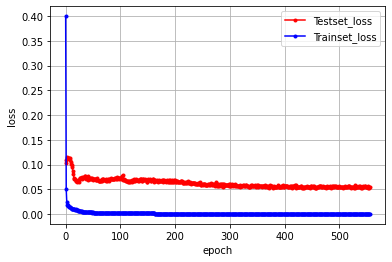

In [ ]:

#그래프 그려보기

# 검증용셋의 오차
y_vloss = hist.history['val_loss']

# 학습셋의 오차
y_loss = hist.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label = "Testset_loss")
plt.plot(x_len, y_loss, marker='.', c="blue", label = "Trainset_loss")

#그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
y_valid.min()

0.0

In [ ]:
y_valid_predicted.min()

0.3135214

In [ ]:
# 30일 데이터를 그래프로 그리기 위해 flatten
y_valid_real = y_valid_real.flatten()
y_valid_predicted_real = y_valid_predicted_real.flatten()

print(y_valid_real.shape[0] // 30)

draw_real_valid = []
draw_pred_valid = []

# # 30일 단위로 예측을 했으므로 30일 간격을 가진 채로 이어붙이기
idx = 0
while idx < y_valid_real.shape[0]:
  draw_real_valid.append(y_valid_real[idx])
  draw_pred_valid.append(y_valid_predicted_real[idx])
  idx += 30

# draw_real_valid[0:60]


344


In [ ]:
# 30일 데이터를 그래프로 그리기 위해 flatten
y_train_real = y_train_real.flatten()
y_predicted_real = y_predicted_real.flatten()

print(y_train_real.shape[0] // 30)

draw_real = []
draw_pred = []

# 30일 단위로 예측을 했으므로 365일 간격을 가진 채로 이어붙이기
idx = 0
while idx < y_train_real.shape[0]:
  draw_real.append(y_train_real[idx])
  draw_pred.append(y_predicted_real[idx])
  idx += 30

# draw_real_valid[0:60]

800


In [ ]:
print(len(draw_pred))

800


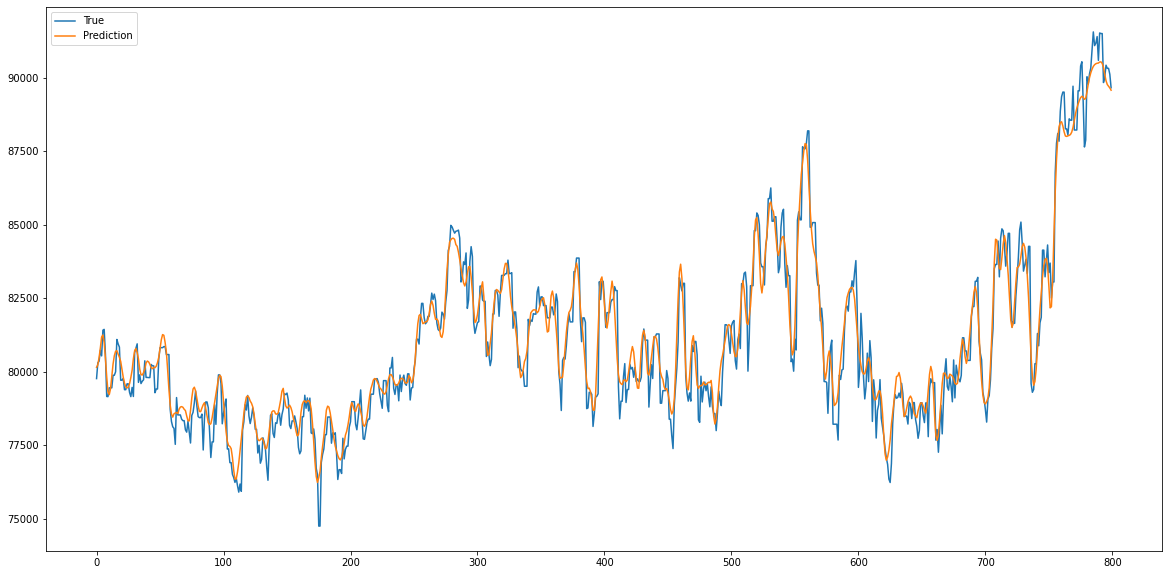

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(draw_real, label='True')
ax.plot(draw_pred, label='Prediction')
ax.legend()
plt.show()

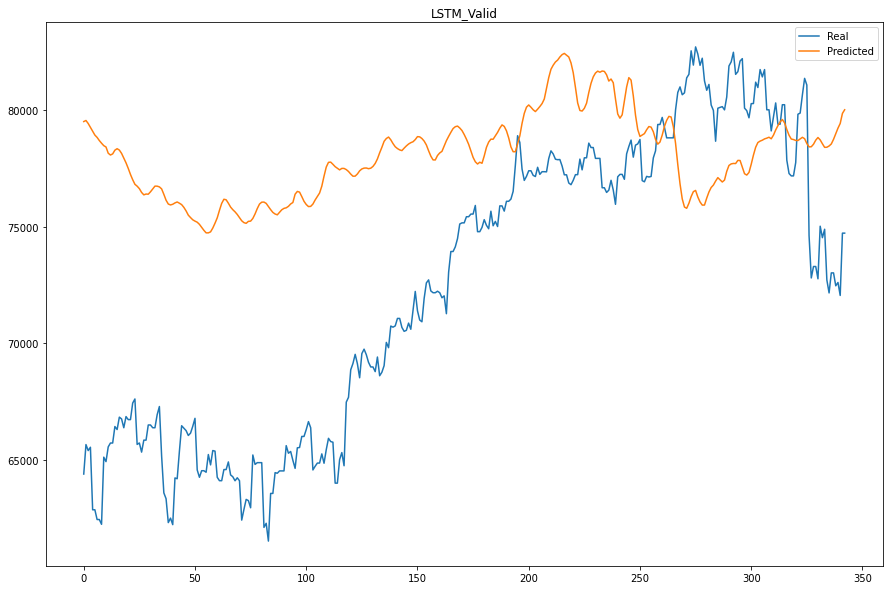

In [ ]:
# 1년치 데이터를 그래프로 그리기 위해 flatten
# draw_real_valid = y_valid_real.flatten()
# draw_pred_valid = y_valid_predicted.flatten()

import matplotlib.pyplot as plt

plt.gcf().set_size_inches(15, 10, forward=True)

start = 0
end = -1

real = plt.plot(draw_real_valid[start:end], label='real')
pred = plt.plot(draw_pred_valid[start:end], label='predicted')

plt.legend(['Real', 'Predicted'])
plt.title('LSTM_Valid')
plt.show()

In [ ]:
# real data
draw_real[1]

80300

In [ ]:
# predict data
draw_pred[0]

80150.23

In [ ]:
print('-------------Train-------------')
for i in range(30):
  print('실제 가격 : ' , draw_real[i], end="")
  print(' / 예측 가격 : ', draw_pred[i])

-------------Train-------------
실제 가격 :  79766 / 예측 가격 :  80150.23
실제 가격 :  80300 / 예측 가격 :  80236.22
실제 가격 :  80359 / 예측 가격 :  80484.555
실제 가격 :  80733 / 예측 가격 :  80811.73
실제 가격 :  80538 / 예측 가격 :  81181.73
실제 가격 :  81413 / 예측 가격 :  81249.516
실제 가격 :  81440 / 예측 가격 :  80995.83
실제 가격 :  80583 / 예측 가격 :  80451.59
실제 가격 :  79158 / 예측 가격 :  79826.734
실제 가격 :  79153 / 예측 가격 :  79316.98
실제 가격 :  79452 / 예측 가격 :  79219.75
실제 가격 :  79452 / 예측 가격 :  79420.945
실제 가격 :  79452 / 예측 가격 :  79829.89
실제 가격 :  79879 / 예측 가격 :  80259.555
실제 가격 :  79879 / 예측 가격 :  80544.77
실제 가격 :  79997 / 예측 가격 :  80695.41
실제 가격 :  81097 / 예측 가격 :  80714.13
실제 가격 :  80946 / 예측 가격 :  80595.27
실제 가격 :  80836 / 예측 가격 :  80488.95
실제 가격 :  79711 / 예측 가격 :  80353.34
실제 가격 :  79711 / 예측 가격 :  80072.47
실제 가격 :  79775 / 예측 가격 :  79815.94
실제 가격 :  79389 / 예측 가격 :  79609.85
실제 가격 :  79389 / 예측 가격 :  79488.6
실제 가격 :  79588 / 예측 가격 :  79448.95
실제 가격 :  79588 / 예측 가격 :  79474.3
실제 가격 :  79294 / 예측 가격 :  79595.92
실제 가격 :  79153 / 예측 

In [ ]:
print('-------------Train-------------')
for i in range(90):
  print('실제 가격 - 예측 가격 : ', draw_real[i] - draw_pred[i])

-------------Train-------------
실제 가격 - 예측 가격 :  -384.2265625
실제 가격 - 예측 가격 :  63.78125
실제 가격 - 예측 가격 :  -125.5546875
실제 가격 - 예측 가격 :  -78.7265625
실제 가격 - 예측 가격 :  -643.7265625
실제 가격 - 예측 가격 :  163.484375
실제 가격 - 예측 가격 :  444.171875
실제 가격 - 예측 가격 :  131.40625
실제 가격 - 예측 가격 :  -668.734375
실제 가격 - 예측 가격 :  -163.9765625
실제 가격 - 예측 가격 :  232.25
실제 가격 - 예측 가격 :  31.0546875
실제 가격 - 예측 가격 :  -377.890625
실제 가격 - 예측 가격 :  -380.5546875
실제 가격 - 예측 가격 :  -665.7734375
실제 가격 - 예측 가격 :  -698.40625
실제 가격 - 예측 가격 :  382.8671875
실제 가격 - 예측 가격 :  350.7265625
실제 가격 - 예측 가격 :  347.046875
실제 가격 - 예측 가격 :  -642.34375
실제 가격 - 예측 가격 :  -361.46875
실제 가격 - 예측 가격 :  -40.9375
실제 가격 - 예측 가격 :  -220.8515625
실제 가격 - 예측 가격 :  -99.6015625
실제 가격 - 예측 가격 :  139.046875
실제 가격 - 예측 가격 :  113.703125
실제 가격 - 예측 가격 :  -301.921875
실제 가격 - 예측 가격 :  -648.421875
실제 가격 - 예측 가격 :  -581.703125
실제 가격 - 예측 가격 :  -1282.1015625
실제 가격 - 예측 가격 :  -62.984375
실제 가격 - 예측 가격 :  1.1953125
실제 가격 - 예측 가격 :  300.046875
실제 가격 - 예측 가격 :  -799.828125

In [ ]:
print('-------------Test-------------')
for i in range(30):
  print('실제 가격 : ' , draw_real_valid[i], end="")
  print(' / 예측 가격 : ', draw_pred_valid[i])

-------------Test-------------
실제 가격 :  64390 / 예측 가격 :  79507.3
실제 가격 :  65654 / 예측 가격 :  79553.195
실제 가격 :  65397 / 예측 가격 :  79423.98
실제 가격 :  65539 / 예측 가격 :  79255.54
실제 가격 :  62858 / 예측 가격 :  79083.21
실제 가격 :  62858 / 예측 가격 :  78927.98
실제 가격 :  62440 / 예측 가격 :  78828.03
실제 가격 :  62440 / 예측 가격 :  78693.19
실제 가격 :  62235 / 예측 가격 :  78578.88
실제 가격 :  65114 / 예측 가격 :  78473.92
실제 가격 :  64923 / 예측 가격 :  78417.65
실제 가격 :  65555 / 예측 가격 :  78149.87
실제 가격 :  65721 / 예측 가격 :  78072.555
실제 가격 :  65721 / 예측 가격 :  78120.56
실제 가격 :  66428 / 예측 가격 :  78280.84
실제 가격 :  66300 / 예측 가격 :  78343.13
실제 가격 :  66831 / 예측 가격 :  78284.61
실제 가격 :  66754 / 예측 가격 :  78142.8
실제 가격 :  66376 / 예측 가격 :  77937.92
실제 가격 :  66855 / 예측 가격 :  77737.445
실제 가격 :  66725 / 예측 가격 :  77499.414
실제 가격 :  66725 / 예측 가격 :  77240.02
실제 가격 :  67435 / 예측 가격 :  77012.84
실제 가격 :  67610 / 예측 가격 :  76817.22
실제 가격 :  65660 / 예측 가격 :  76736.484
실제 가격 :  65723 / 예측 가격 :  76630.34
실제 가격 :  65331 / 예측 가격 :  76468.01
실제 가격 :  65844 / 예측 가

In [ ]:
print('-------------Test-------------')
for i in range(30):
  print('실제 가격 - 예측 가격 : ', draw_real_valid[i] - draw_pred_valid[i])

-------------Test-------------
실제 가격 - 예측 가격 :  -15117.296875
실제 가격 - 예측 가격 :  -13899.1953125
실제 가격 - 예측 가격 :  -14026.9765625
실제 가격 - 예측 가격 :  -13716.5390625
실제 가격 - 예측 가격 :  -16225.2109375
실제 가격 - 예측 가격 :  -16069.9765625
실제 가격 - 예측 가격 :  -16388.03125
실제 가격 - 예측 가격 :  -16253.1875
실제 가격 - 예측 가격 :  -16343.8828125
실제 가격 - 예측 가격 :  -13359.921875
실제 가격 - 예측 가격 :  -13494.6484375
실제 가격 - 예측 가격 :  -12594.8671875
실제 가격 - 예측 가격 :  -12351.5546875
실제 가격 - 예측 가격 :  -12399.5625
실제 가격 - 예측 가격 :  -11852.84375
실제 가격 - 예측 가격 :  -12043.1328125
실제 가격 - 예측 가격 :  -11453.609375
실제 가격 - 예측 가격 :  -11388.796875
실제 가격 - 예측 가격 :  -11561.921875
실제 가격 - 예측 가격 :  -10882.4453125
실제 가격 - 예측 가격 :  -10774.4140625
실제 가격 - 예측 가격 :  -10515.0234375
실제 가격 - 예측 가격 :  -9577.84375
실제 가격 - 예측 가격 :  -9207.21875
실제 가격 - 예측 가격 :  -11076.484375
실제 가격 - 예측 가격 :  -10907.34375
실제 가격 - 예측 가격 :  -11137.0078125
실제 가격 - 예측 가격 :  -10520.09375
실제 가격 - 예측 가격 :  -10555.265625
실제 가격 - 예측 가격 :  -9896.78125
